<a href="https://colab.research.google.com/github/lahiardhan/Dicoding-Data-Analisis-Dengan-Python/blob/main/Brazilian_E_Commerce_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Nama dataset
- Nama: Muhammad Lahia Ardhan
- Email: lahia.ardhanm@gmail.com
- Id Dicoding:

## 1. Menentukan Pertanyaan Bisnis

- Bagaimana distribusi jumlah order berdasarkan bulan dan apakah ada tren peningkatan atau penurunan selama periode waktu tertentu?
- Produk apa dengan jumlah pembelian paling banyak dan paling sedikit?
- Bagaimana korelasi antara metode pembayaran dan tingkat kepuasan pelanggan? Apakah metode pembayaran tertentu berkontribusi pada tingkat kepuasan yang lebih tinggi?

## 2. Menyiapkan semua library yang dibuthkan

In [1]:
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## 3. Data Wrangling

### 3.1 Gathering Data

Menginstal kaggle API untuk memungkinkan akses ke dataset dari Kaggle.

In [2]:
# Install Kaggle API
!pip install kaggle

Menggunakan Google Colab untuk mengunggah file Kaggle JSON yang berisi kredensial API.

In [3]:
# Upload File Kaggle JSON
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


Membuat folder Kaggle di direktori pengguna dan memindahkan file Kaggle JSON ke dalamnya dengan memberikan izin akses berupa API Key yang diupload di cell sebelumnya.

In [4]:
# Pindahkan File JSON ke folder Root

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Menggunakan kaggle CLI untuk mengunduh dataset "Brazilian E-Commerce" dari Kaggle.
Dataset akan otomatis disimpan dalam direktori saat ini di Google Colab.

In [5]:
# Unduh Dataset dari Kaggle
!kaggle datasets download -d olistbr/brazilian-ecommerce

 87% 37.0M/42.6M [00:00<00:00, 132MB/s]
100% 42.6M/42.6M [00:00<00:00, 130MB/s]


In [6]:
zip_ref = zipfile.ZipFile('brazilian-ecommerce.zip', 'r')
zip_ref.extractall('datasets/')
zip_ref.close()

Kode ini membaca dataset e-commerce Brazil dari file CSV, kemudian menyusunnya dalam bentuk dictionary untuk memudahkan akses dan analisis data.

In [7]:
# Base Dataset Directory
data_dir = "./datasets/"

# Opening Datasets
customers = pd.read_csv(data_dir + 'olist_customers_dataset.csv')
geolocation = pd.read_csv(data_dir + 'olist_geolocation_dataset.csv')
items = pd.read_csv(data_dir + 'olist_order_items_dataset.csv')
payments = pd.read_csv(data_dir + 'olist_order_payments_dataset.csv')
reviews = pd.read_csv(data_dir + 'olist_order_reviews_dataset.csv')
orders = pd.read_csv(data_dir + 'olist_orders_dataset.csv')
products = pd.read_csv(data_dir + 'olist_products_dataset.csv')
sellers = pd.read_csv(data_dir + 'olist_sellers_dataset.csv')
category = pd.read_csv(data_dir + 'product_category_name_translation.csv')

data = {'customers': customers,
        'geolocation': geolocation,
        'items': items,
        'payments': payments,
        'reviews': reviews,
        'orders': orders,
        'products': products,
        'sellers': sellers,
        'category': category,}

Beberapa cell di bawah ini digunakan untuk melihat representasi data masing-masing dataframe untuk memudahkan proses analisis data nantinya.

In [8]:
data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
data['geolocation'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [10]:
data['items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
data['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [12]:
data['reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [13]:
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [14]:
data['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [15]:
data['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [16]:
data['category'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### 3.2 Assessing Data

#### Checking Data Types
Memeriksa setiap DataFrame dalam dataset dan mencetak informasi ringkas tentang struktur dan tipe data masing-masing DataFrame.

In [17]:
for df_name, df in data.items():
    # Print DataFrame information
    print(f"\n\n-------------{df_name} DataFrame:-------------")
    df.info()



-------------customers DataFrame:-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


-------------geolocation DataFrame:-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geoloca

#### Check for Duplicates
Menghitung dan menyajikan jumlah duplikat serta total jumlah sampel untuk setiap DataFrame dalam dataset. Hasilnya ditampilkan dalam dua DataFrames terpisah, yaitu df_duplicates untuk jumlah duplikat dan df_total_samples untuk total jumlah sampel. Gabungan kedua DataFrames ini, yaitu result_df, memberikan informasi ringkas tentang jumlah sampel dan duplikat dalam dataset.

In [18]:
# Inisialisasi dictionary untuk menyimpan jumlah duplikat dan total jumlah sampel
counts_duplicates = {}
counts_total_samples = {}

# Hitung dan simpan jumlah duplikat dan total jumlah sampel untuk setiap DataFrame
for table_name, table_data in data.items():
    counts_duplicates[table_name] = table_data.duplicated().sum()
    counts_total_samples[table_name] = len(table_data)  # Hitung total jumlah sampel

# Buat DataFrames dari dictionary
df_duplicates = pd.DataFrame.from_dict(counts_duplicates, orient='index', columns=['Jumlah Duplikat'])
df_total_samples = pd.DataFrame.from_dict(counts_total_samples, orient='index', columns=['Total Jumlah Sampel'])

# Gabungkan dua DataFrames dengan menggabungkannya secara horizontal
result_df = pd.concat([df_total_samples, df_duplicates], axis=1)

result_df

,Total Jumlah Sampel,Jumlah Duplikat
customers,99441,0
geolocation,1000163,261831
items,112650,0
payments,103886,0
reviews,99224,0
orders,99441,0
products,32951,0
sellers,3095,0
category,71,0


#### Check For Missing Values
Mengidentifikasi dan menyimpan jumlah nilai null (missing values) pada setiap DataFrame dalam dataset, memungkinkan analisis cepat terhadap keberadaan data kosong di setiap tabel.

In [19]:
# Initialize a dictionary to store null value counts for each DataFrame
missing_value_counts = {}

# Calculate and store the null value counts for each DataFrame
for dataframe_name, dataframe in data.items():
    missing_value_counts[dataframe_name] = dataframe.isna().sum()
    print(dataframe_name, '\n', missing_value_counts[dataframe_name], '\n')

customers 
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 

geolocation 
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64 

items 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

payments 
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 

reviews 
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64 

orders 
 order_id  

### 3.3 Cleaning Data

#### Mengubah beberapa tipe data fitur yang tidak sesuai
mengonversi kolom-kolom tertentu dalam DataFrame 'orders', 'items', dan 'reviews' menjadi tipe data datetime. Hal ini memastikan bahwa data tanggal dan waktu dalam dataset telah diubah ke format yang sesuai untuk analisis waktu lebih lanjut.

In [20]:
def convert_to_datetime(data, columns):
    for column in columns:
        data[column] = pd.to_datetime(data[column])
    return data

datetime_orders = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
data['orders'] = convert_to_datetime(data['orders'], datetime_orders)

datetime_items = ["shipping_limit_date"]
data['items'] = convert_to_datetime(data['items'], datetime_items)

datetime_reviews = ["review_creation_date", "review_answer_timestamp"]
data['reviews'] = convert_to_datetime(data['reviews'], datetime_reviews)

In [21]:
data['orders'].info()
data['items'].info()
data['reviews'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype     

#### Menghapus Data Duplikat
Menghapus data duplikat dalam DataFrame Geolocation

In [22]:
data['geolocation'].duplicated().sum()

261831

In [23]:
data['geolocation'].drop_duplicates(inplace=True)
data['geolocation'].duplicated().sum()

0

#### Cleaning Data Null

pertama saya akan mengecek berapa persen banyak data null di setiap kolom masing masing dataframe

In [24]:
for df_name, df in data.items():
  for col in df.columns:
    if df[col].isnull().sum():
      print(f'{col} (Null): {(df[col].isnull().sum()/len(df))*100} %')

review_comment_title (Null): 88.34153027493349 %
review_comment_message (Null): 58.70253164556962 %
order_approved_at (Null): 0.1608994278014099 %
order_delivered_carrier_date (Null): 1.7930229985619612 %
order_delivered_customer_date (Null): 2.981667521444877 %
product_category_name (Null): 1.8512336499650999 %
product_name_lenght (Null): 1.8512336499650999 %
product_description_lenght (Null): 1.8512336499650999 %
product_photos_qty (Null): 1.8512336499650999 %
product_weight_g (Null): 0.006069618524475737 %
product_length_cm (Null): 0.006069618524475737 %
product_height_cm (Null): 0.006069618524475737 %
product_width_cm (Null): 0.006069618524475737 %


##### Reviews DF
- sebanyak 88% lebih terdapat null values pada kolom **review_comment_title** sehingga saya akan melakukan drop pada kolom tersebut.
- sebanyak 58% lebih terdapat null values pada kolom **review_comment_message**, namun karena menurut saya ini dapat digunakan untuk proses analisis lain seperti sentiment analysis di kemudian hari, saya akan mengubah Null values dengan string **"No Message"**

In [25]:
data['reviews'].drop('review_comment_title', axis= 1, inplace= True)
data['reviews']['review_comment_message'].fillna('No Message', inplace=True)

In [26]:
data['reviews'].isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

##### Orders DF & Products DF
untuk kedua dataframe ini saya tidak akan melakukan pengisian dengan value baru atau menghilangkan kolom tertentu karena dapat menghilangkan informasi penting dari data.

In [27]:
data['orders'].isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [28]:
data['products'].isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

## 4. Exploratory Data Analysis (EDA)

### Explore Customers & Orders

In [29]:
data['customers'].sample(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
14975,d91269dd81b9bce4f785fb94e5189872,a2694c5df9183031534e4dbdd7411377,7942,francisco morato,SP
42852,0c4193409d3d33915a701485f8d6e0e8,4c7ddb7b5d196b2967554adca4964542,72125,brasilia,DF


In [30]:
city_customer_counts = data['customers'].groupby(by="customer_city")['customer_id'].nunique().sort_values(ascending=False)
city_customer_counts = data['customers'].groupby(by="customer_state")['customer_id'].nunique().sort_values(ascending=False)
print(city_customer_counts)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64


In [31]:
data['orders'].sample(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
19808,ffa39020fe7c8a3e907320e1bec4b985,26978239b9a0ccb40d576a0a099158b0,delivered,2017-10-31 18:34:34,2017-10-31 19:34:38,2017-11-03 23:57:43,2017-11-21 20:41:55,2017-11-28
26077,357f7b414f17d6c711ff3cd09b44020b,f456c97ea0cd35c21764081d00e402bf,delivered,2018-06-20 07:49:50,2018-06-21 18:40:32,2018-06-22 13:37:00,2018-06-25 17:26:30,2018-07-05


### Explore Geolocation

In [32]:
data['geolocation'].sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
422782,21070,-22.844050,-43.283425,rio de janeiro,RJ
382779,18185,-23.815962,-47.717920,pilar do sul,SP
208228,8542,-23.518776,-46.368970,ferraz de vasconcelos,SP
69563,3977,-23.616756,-46.497395,sao paulo,SP
990998,98280,-28.287733,-53.515764,panambi,RS


### Explore Items & Sellers

In [33]:
data['items'].sample(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
79773,b56aea9fd0510dad0a8d11f4ec40e1bd,1,c10a7001e8b49dfc03817444b5f2ed81,056b4ada5bbc2c50cc7842547dda6b51,2018-07-12 22:15:07,129.99,9.25
107379,f400946403a78fdd034cf522d3f85512,1,9251443819682703b07d22f78d20d603,48efc9d94a9834137efd9ea76b065a38,2017-01-30 10:00:37,14.90,17.78


In [34]:
data['sellers'].sample(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
537,f19516b9ff26bfeb091b30108db4ddbd,13160,artur nogueira,SP
2438,31e60bf8d103ce47932a85f5562deb16,74590,goiania,GO


In [35]:
items_sellers_df = pd.merge(
    left=data['items'],
    right=data['sellers'],
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)

items_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


### Explore Products-Category & Items

menggabungkan DataFrame 'products' dengan 'category' berdasarkan kolom 'product_category_name', sehingga menghasilkan DataFrame baru ('product_df') yang mencakup informasi kategori produk. Hal ini mempermudah analisis dan pemahaman terkait kategori produk dan produk itu sendiri dalam satu dataset.

In [36]:
product_df = pd.merge(
    left=data['products'],
    right=data['category'],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


menggabungkan DataFrame produk_df yang merupakan gabungan produk dan category sebelumnya, dengan item berdasarkan kolom 'product_id', menciptakan DataFrame baru yang memuat informasi produk beserta detail itemnya.

In [37]:
products_items_df = pd.merge(
    left=product_df,
    right=data['items'],
    how="left",
    left_on="product_id",
    right_on="product_id"
)

products_items_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


### Explore Payments & Reviews
menggabungkan DataFrame 'payments' dan 'reviews' berdasarkan kolom 'order_id', menyatukan informasi pembayaran dan ulasan produk. Hal ini membantu analisis terkait hubungan antara metode pembayaran dan skor ulasan pelanggan dalam suatu pesanan.







In [38]:
payments_reviews_df = pd.merge(
    left=data['payments'],
    right=data['reviews'],
    how='left',
    left_on='order_id',
    right_on='order_id'
)

payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,No Message,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,No Message,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,No Message,2017-12-21,2017-12-22 01:10:39


In [39]:
payments_reviews_df['payment_type'].value_counts()

credit_card    77198
boleto         19910
voucher         5830
debit_card      1536
not_defined        3
Name: payment_type, dtype: int64

## 5. Visualization & Explanatory Analysis

### Q1. Bagaimana distribusi jumlah order berdasarkan bulan dan apakah ada tren peningkatan atau penurunan selama periode Juni 2017 sampai Mei 2018?


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Konversi kolom tanggal ke tipe data datetime
data['orders']['order_purchase_timestamp'] = pd.to_datetime(data['orders']['order_purchase_timestamp'])

# Filter data hanya untuk periode September 2017 hingga September 2018
filtered_orders = data['orders'][
    (data['orders']['order_purchase_timestamp'] >= '2017-06-01') &
    (data['orders']['order_purchase_timestamp'] <= '2018-05-31')
]

# Distribusi jumlah order berdasarkan bulan
monthly_order_counts = filtered_orders.resample('M', on='order_purchase_timestamp').size()

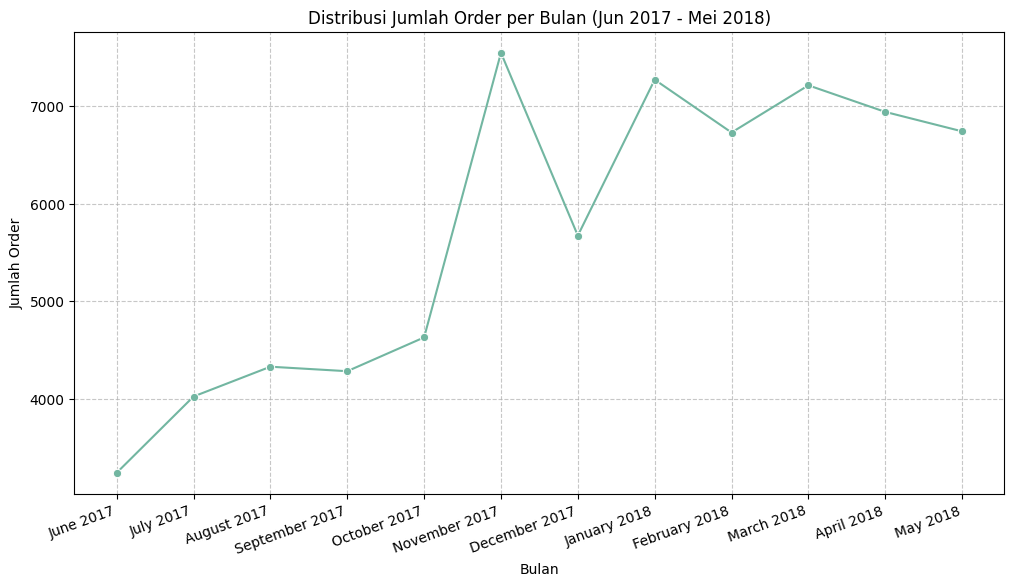

In [76]:
# Plot distribusi jumlah order berdasarkan bulan
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_order_counts.index.strftime('%B %Y'), y=monthly_order_counts.values, marker='o', color='#72B6A1')
plt.title('Distribusi Jumlah Order per Bulan (Jun 2017 - Mei 2018)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Order')
plt.xticks(rotation=20, ha='right')  # Memutar label bulan agar lebih mudah dibaca
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [53]:
# Menampilkan jumlah order terbanyak dan tersedikit
most_orders_month = monthly_order_counts.idxmax().strftime('%B %Y')
least_orders_month = monthly_order_counts.idxmin().strftime('%B %Y')

print(f"Jumlah order terbanyak: {monthly_order_counts.max()} pada bulan {most_orders_month}")
print(f"Jumlah order tersedikit: {monthly_order_counts.min()} pada bulan {least_orders_month}")


Jumlah order terbanyak: 7544 pada bulan November 2017
Jumlah order tersedikit: 3245 pada bulan June 2017


### Q2. Produk apa dengan jumlah pembelian paling banyak dan paling sedikit?


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Jumlah semua produk terjual
purchased_products = products_items_df['product_category_name_english'].value_counts()

# Produk dengan jumlah pembelian paling banyak
most_purchased = purchased_products.idxmax()
most_purchased_count = purchased_products.max()

# Produk dengan jumlah pembelian paling sedikit
least_purchased = purchased_products.idxmin()
least_purchased_count = purchased_products.min()

# Data untuk plot pembelian terbanyak
top_products = purchased_products.head(6)  # Ambil 12 produk teratas untuk plot

# Data untuk plot pembelian tersedikit
least_purchased_data = products_items_df[products_items_df['product_category_name_english'].isin(purchased_products.nsmallest(6).index)]
least_purchased_data_counts = least_purchased_data['product_category_name_english'].value_counts()
# Mengurutkan data berdasarkan jumlah pembelian
least_purchased_data_counts = least_purchased_data_counts.sort_values()

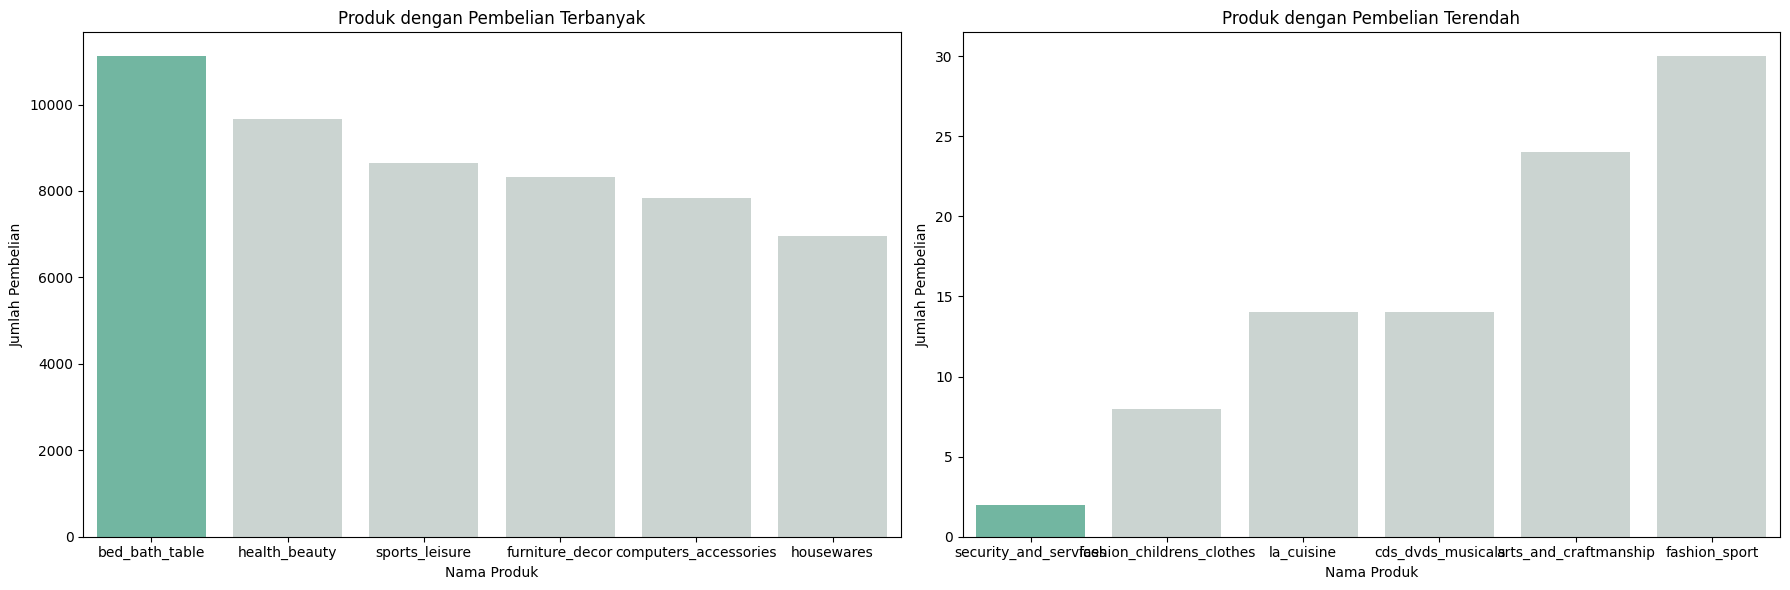

In [75]:
# Set warna palet untuk bar plot
palette = sns.color_palette("Set2")

# Warna khusus untuk produk terbanyak dan tersedikit
special_colors = {'Produk dengan Pembelian Terbanyak': 'cyan', 'Produk dengan Pembelian Terendah': '#72B6A1'}

# Mendapatkan posisi produk dengan pembelian tersedikit
least_purchased_index = least_purchased_data_counts.index.get_loc(least_purchased)

# Plot produk dengan pembelian terbanyak dan terendah secara bersebelahan
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Bar plot untuk produk terbanyak
sns.barplot(x=top_products.index, y=top_products.values, palette=palette, ax=axes[0])
axes[0].set_title('Produk dengan Pembelian Terbanyak')
axes[0].set_xlabel('Nama Produk')
axes[0].set_ylabel('Jumlah Pembelian')

# Menambahkan warna khusus untuk produk terbanyak
for i, bar in enumerate(axes[0].patches):
    if i == least_purchased_index:
        bar.set_facecolor(special_colors['Produk dengan Pembelian Terendah'])
    else:
        bar.set_facecolor('#cbd4d1')  # Warna abu-abu

# Bar plot untuk produk tersedikit
sns.barplot(x=least_purchased_data_counts.index, y=least_purchased_data_counts.values, palette=palette, ax=axes[1])
axes[1].set_title('Produk dengan Pembelian Terendah')
axes[1].set_xlabel('Nama Produk')
axes[1].set_ylabel('Jumlah Pembelian')

# Menambahkan warna khusus untuk produk tersedikit
for i, bar in enumerate(axes[1].patches):
    if i == least_purchased_index:
        bar.set_facecolor(special_colors['Produk dengan Pembelian Terendah'])
    else:
        bar.set_facecolor('#cbd4d1')  # Warna abu-abu

plt.tight_layout()
plt.show()

In [55]:
print(f"Produk dengan pembelian terbanyak: {most_purchased} (Jumlah pembelian: {most_purchased_count})")
print(f"Produk dengan pembelian terendah: {least_purchased} (Jumlah pembelian: {least_purchased_count})")

Produk dengan pembelian terbanyak: bed_bath_table (Jumlah pembelian: 11115)
Produk dengan pembelian terendah: security_and_services (Jumlah pembelian: 2)


### Q3. Dimanakah Lokasi dengan Pelanggan Terbanyak?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib.request

# Menghitung jumlah state yang memiliki zip code prefix lebih dari satu
other_state_geo_count = data['geolocation'].groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
zip_codes_multiple_states = other_state_geo_count[other_state_geo_count['count'] >= 2]

# Mencari state dengan zip code prefix terbanyak
max_state_counts = data['geolocation'].groupby(['geolocation_zip_code_prefix', 'geolocation_state']).size().reset_index(name='count')
max_state = max_state_counts.drop_duplicates(subset='geolocation_zip_code_prefix').drop('count', axis=1)

# Membuat DataFrame untuk geolokasi dengan median lat-lng dan hanya untuk zip codes dengan multiple states
geo_silver = data['geolocation'].groupby(['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'])[['geolocation_lat', 'geolocation_lng']].median().reset_index()
geo_silver = geo_silver.merge(max_state, on=['geolocation_zip_code_prefix', 'geolocation_state'], how='inner')

# Menggabungkan dengan data pelanggan
customers_silver = data['customers'].merge(geo_silver, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')

# Menyimpan hasil ke file CSV
customers_silver.to_csv("./datasets/geolocation_silver.csv", index=False)

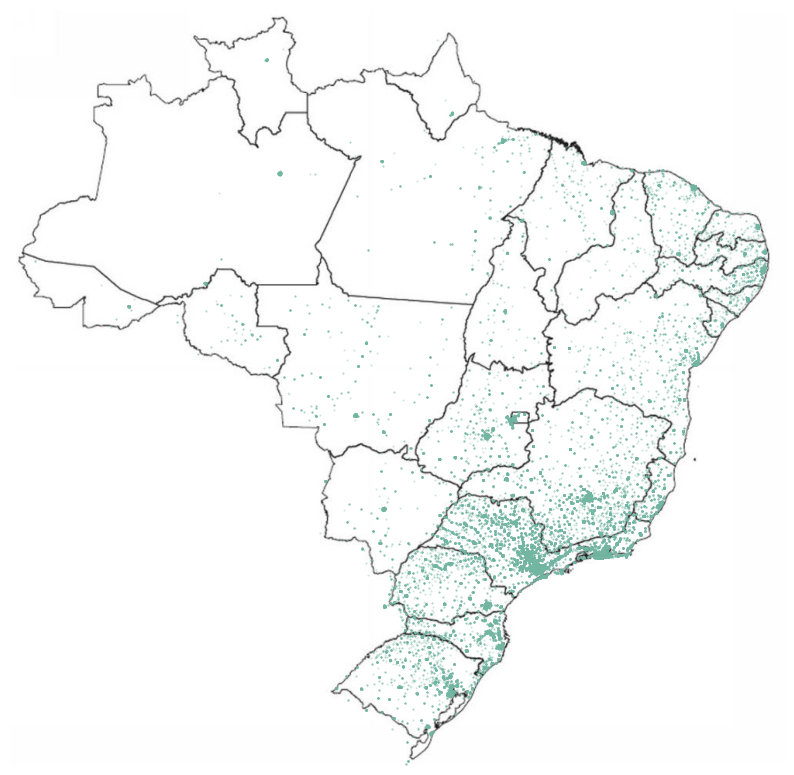

In [78]:
# Fungsi untuk membuat plot peta Brazil
def plot_brazil_map(data):
    brazil_map_image = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'), 'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10, 10), alpha=0.3, s=0.3, c='#72B6A1')
    plt.axis('off')
    plt.imshow(brazil_map_image, extent=[-73.98283055, -33.8, -33.75116944, 5.4])
    plt.show()

# Menjalankan fungsi untuk membuat plot peta Brazil
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

## 6. Conclusion

* **Q1. Bagaimana distribusi jumlah order berdasarkan bulan dan apakah ada tren peningkatan atau penurunan selama periode Juni 2017 sampai Mei 2018?**
> Distribusi jumlah order berdasarkan bulan menunjukkan variasi yang signifikan selama periode Juni 2017 hingga Mei 2018. Puncak jumlah order terbanyak terjadi pada bulan November 2017 dengan 7544 order, sementara jumlah order tersedikit tercatat pada bulan Juni 2017 dengan 3245 order. Selanjutnya, terdapat tren peningkatan jumlah order setelah bulan November 2017, menunjukkan adanya pertumbuhan dalam aktivitas pembelian selama periode tersebut.


---


* **Q2. Produk apa dengan jumlah pembelian paling banyak dan paling sedikit?**
> Berdasarkan analisis data penjualan, ditemukan bahwa produk dengan jumlah pembelian terbanyak adalah "bed_bath_table" dengan total 11,115 pembelian, sedangkan produk dengan jumlah pembelian terendah adalah "security_and_services" dengan hanya 2 pembelian. Kesimpulannya, kategori produk "bed_bath_table" menjadi favorit pelanggan dengan tingkat penjualan yang jauh lebih tinggi dibandingkan dengan kategori "security_and_services".


---


* **Q3. Dimanakah Lokasi dengan Pelanggan Terbanyak?**
> Berdasarkan grafik yang telah dibuat, dapat disimpulkan bahwa lokasi dengan jumlah pelanggan terbanyak terdapat di wilayah tenggara dan selatan. Selain itu, ditemukan bahwa terdapat lebih banyak pelanggan di kota-kota yang merupakan ibu kota seperti São Paulo, Rio de Janeiro, Brasília, dan lainnya. Hal ini memberikan gambaran bahwa aktivitas pelanggan lebih tinggi di wilayah-wilayah tersebut.